
<center><img src="https://pure.ups.edu.ec/skin/headerImage/" width="300" height="300"></center>

<h1><center>Universidad Politecnica Salesiana</center></h1>
<h2><center>Modelo Regresion</center></h2>


<b>Nombre: </b> Javier Vazquez

<b>Materia: </b> Simulacion



In [1]:
import pandas as pd

#### Carga de datos del archivo 'post_Guillermo.csv'

* Al momento de realizar el crawler, existen tweets que no cuentan con mucho tiempo de haber sido publicados por ende no cuentan con reacciones, comentarios o compartidos por lo que llenamos esos valores con '0'

In [2]:
df = pd.read_csv('post_Guillermo.csv')
df.fillna(0)
df

,nombre,username,contenido,comentarios,reacciones,compartido
0,Guillermo Lasso,@LassoGuillermo,·Primeros pasos del #PlanVacunación9100. Es un...,57,731,146
1,Guillermo Lasso,@LassoGuillermo,·El #PlanVacunación9100 es \n\nSALUD\nBIENESTA...,61,920,199
2,Guillermo Lasso,@LassoGuillermo,·¡Sé parte del #PlanVacunación9100! Acudamos d...,49,756,266
3,Ministerio de Educación del Ecuador,@Educacion_Ec,"·#JuntosLoLogramos En el #DíaDelEstudiante, ...",49,438,115
4,Guillermo Lasso,@LassoGuillermo,·¡Felicidades @MorejonGlenda! Ella y más depor...,98,3.8K,620
...,...,...,...,...,...,...
303,Guillermo Lasso,@LassoGuillermo,·Tendremos Centros de Reparación Integral para...,13,283,68
304,Guillermo Lasso,@LassoGuillermo,·Fortaleceremos los espacios para las mujeres ...,10,276,61
305,Guillermo Lasso,@LassoGuillermo,·Promoveremos la conciliación de la vida famil...,41,438,124
306,Guillermo Lasso,@LassoGuillermo,"·Implementaremos mecanismos de protección, den...",38,441,127


* En cualquiera de las redes sociales siempre existen abreviaturas para expresar la cantidad de reacciones, comentarios o compartidos, como 2000 comentarios abreviando a 2k por lo que este formato nos imposibilita trabajar con el modelo de regresión, por lo que se procede a cambiar estos valores mediante una tanto para cualquier columna del dataframe que necesite. 

In [3]:
def convert_str_to_number(x):
    total_stars = 0
    num_map = {'K':1000, 'M':1000000, 'B':1000000000}
        
    if not x.isdigit():
        if len(x) > 1:
            total_stars = float(x[:-1]) * num_map.get(x[-1].upper(), 1)
    else:
        total_stars = int(x)
    return int(total_stars)

### Procesamiento
* Para obtener cuantos hastag existe dentro de un post, se comparo mediante la libreria 're' podemos contabilizar la cantidad de hastag dentro del post
* Contabilizar el numero de palabras se hizo uso de un split mediante separador de espacio 
* Finalmente se cambia los formatos de la cantidad de comentarios, reacciones y compartidos de un tweet

In [4]:
hastag=[]
numero_palabras=[]
cont=0
for i in df['contenido']:
    cont +=1
    if i !=i:
        #print('pasa', cont)
        hastag.append(0)
        numero_palabras.append(0)
    else:
        cont_hastag=0
        for caracter in i:
            #print(caracter)
            if caracter=='#':
                cont_hastag+=1
        hastag.append(cont_hastag)
        #print('bueno')
        numero_palabras.append(len(i.split()))
    
df['hastag']=hastag
df['num_palabras']=numero_palabras

# convertir formato 2.3k a 2300

df['reacciones']=[convert_str_to_number(i) for i in df['reacciones']]
df['compartido']=[convert_str_to_number(i) for i in df['compartido']]
df['comentarios']=[convert_str_to_number(i) for i in df['comentarios']]
df

,nombre,username,contenido,comentarios,reacciones,compartido,hastag,num_palabras
0,Guillermo Lasso,@LassoGuillermo,·Primeros pasos del #PlanVacunación9100. Es un...,57,731,146,2,26
1,Guillermo Lasso,@LassoGuillermo,·El #PlanVacunación9100 es \n\nSALUD\nBIENESTA...,61,920,199,2,17
2,Guillermo Lasso,@LassoGuillermo,·¡Sé parte del #PlanVacunación9100! Acudamos d...,49,756,266,2,33
3,Ministerio de Educación del Ecuador,@Educacion_Ec,"·#JuntosLoLogramos En el #DíaDelEstudiante, ...",49,438,115,2,33
4,Guillermo Lasso,@LassoGuillermo,·¡Felicidades @MorejonGlenda! Ella y más depor...,98,3800,620,4,59
...,...,...,...,...,...,...,...,...
303,Guillermo Lasso,@LassoGuillermo,·Tendremos Centros de Reparación Integral para...,13,283,68,1,32
304,Guillermo Lasso,@LassoGuillermo,·Fortaleceremos los espacios para las mujeres ...,10,276,61,1,22
305,Guillermo Lasso,@LassoGuillermo,·Promoveremos la conciliación de la vida famil...,41,438,124,1,38
306,Guillermo Lasso,@LassoGuillermo,"·Implementaremos mecanismos de protección, den...",38,441,127,1,39


### Creacion del Modelo Regresion 
* Obtenemos las variables de interes, en este caso el modelo sera multivariable, para valores de 'X' (comentarios, num_palabras y reacciones) y para 'Y' la salida, que seria las veces compartidas un tweet

In [5]:
from sklearn.linear_model import LinearRegression

x=df[['comentarios','num_palabras','reacciones','hastag']]
y=df['compartido']

* Realizamos la divsion de los datos para train y test del modelo 
* Utilizamos una regresion Lineal 

In [6]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

modelR = sm.OLS(y_train, X_train).fit()
predict= modelR.predict(X_test)

In [7]:
modelR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             compartido   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              806.7
Date:                Mon, 31 May 2021   Prob (F-statistic):                   1.37e-138
Time:                        19:28:36   Log-Likelihood:                         -1769.0
No. Observations:                 246   AIC:                                      3546.
Df Residuals:                     242   BIC:                                      3560.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
comentarios      1.0145      0.130      7.798      0.000       0.758       1.271
num_palabras    -1.1537      0.739     -1.561      0.120      -2.610       0.302
reacciones       0.1260      0.009     13.436      0.000       0.107       0.144
hastag          37.0617     17.531      2.114      0.036       2.529      71.595
==============================================================================
Omnibus:                       64.882   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1557.495
Skew:                           0.258   Prob(JB):                         0.00
Kurtosis:                      15.316   Cond. No.                     5.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Creacion dataset datos predecidos
* Dataframe con los datos de test y la prediccion arrojada por nuestro modelo 
* Para mas adelante poder 

In [8]:
result=pd.DataFrame({'Actual':y_test,'Prediccion':predict})
result.sort_index(inplace=True)
result

,Actual,Prediccion
3,115,140.931015
5,1800,2253.892327
7,152,146.556986
9,589,667.400340
17,490,422.017938
...,...,...
289,1600,2064.038549
294,95,37.681046
296,147,154.113907
300,152,139.851137


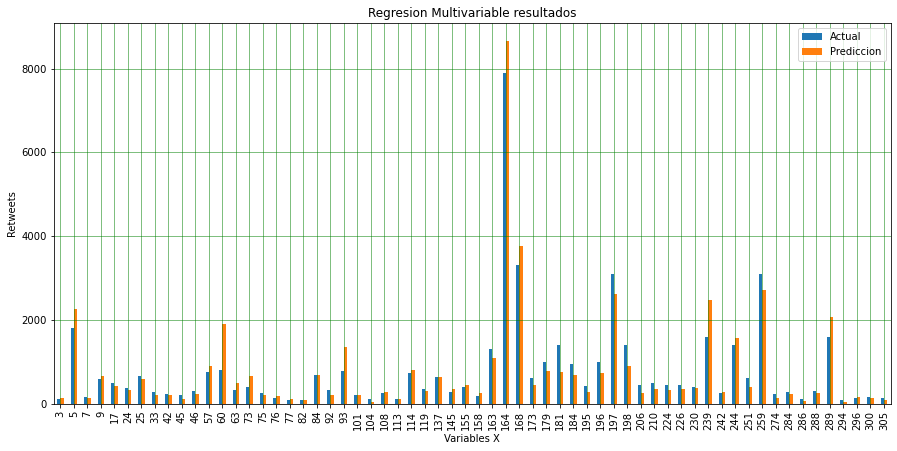

In [9]:
import matplotlib.pyplot as plt 
result.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Regresion Multivariable resultados')
plt.ylabel('Retweets')
plt.xlabel('Variables X')
plt.show()


Text(0, 0.5, 'Retweets')

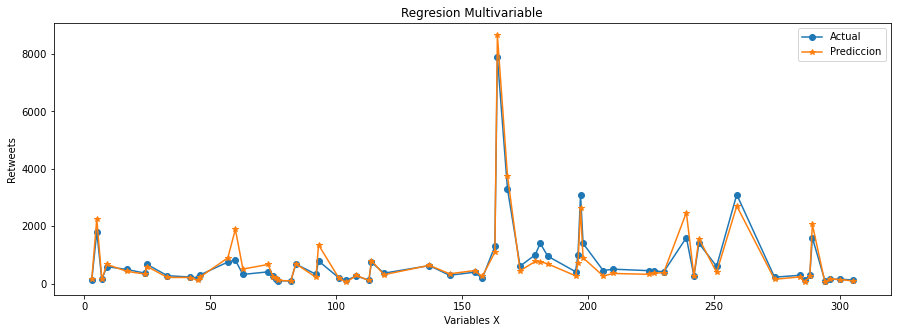

In [10]:
plt.figure(figsize = (15,5))
plt.plot(result.index, result.Actual,'o-')
plt.plot(result.index, result.Prediccion,'*-')
plt.legend(['Actual', 'Prediccion'])
plt.title('Regresion Multivariable')
plt.xlabel('Variables X')
plt.ylabel('Retweets')

### Creacion Modelo Polinomial

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, y, test_size = 0.2, random_state=42)


pol_reg = LinearRegression()
pol_reg.fit(X_train2, y_train2)
pol_pred=pol_reg.predict(X_test2)

In [12]:
result2=pd.DataFrame({'Actual':y_test2,'Prediccion':pol_pred})
result2.sort_index(inplace=True)
result2

,Actual,Prediccion
3,115,266.977014
5,1800,2228.460306
7,152,271.469641
9,589,645.536867
17,490,509.715460
...,...,...
289,1600,1996.207399
294,95,156.335961
296,147,257.390305
300,152,411.521624


Text(0, 0.5, 'Y test Value')

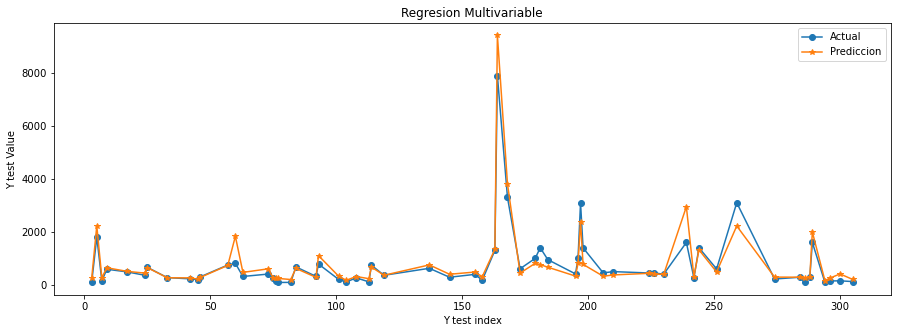

In [13]:
plt.figure(figsize = (15,5))
plt.plot(result2.index, result2.Actual,'o-')
plt.plot(result2.index, result2.Prediccion,'*-')
plt.legend(['Actual', 'Prediccion'])
plt.title('Regresion Multivariable')
plt.xlabel('Y test index')
plt.ylabel('Y test Value')

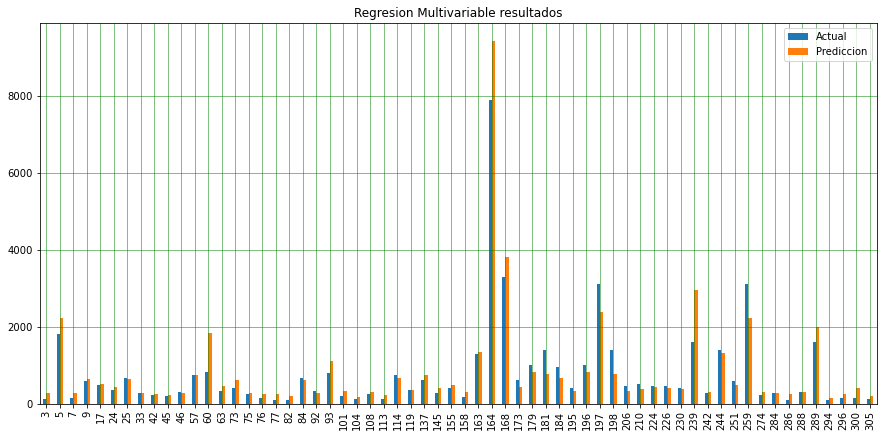

In [14]:
result2.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Regresion Multivariable resultados')
plt.show()

### Prediccion de un tweet

In [15]:
df.iloc [4:5, :]

,nombre,username,contenido,comentarios,reacciones,compartido,hastag,num_palabras
4,Guillermo Lasso,@LassoGuillermo,·¡Felicidades @MorejonGlenda! Ella y más depor...,98,3800,620,4,59


### Regresion Lineal

In [16]:
print('Precision del modelo: ',r2_score(y_test,predict))
print("***( Sera compartido: "+str(int(modelR.predict([df.loc[4]['comentarios'],df.loc[4]['num_palabras'],
                                                       df.loc[4]['reacciones'], df.loc[4]['hastag']])[0]))+" veces )***")

Precision del modelo:  0.9377209236997971
***( Sera compartido: 658 veces )***


### Regresion Polinomial

In [17]:
print('Precision del modelo: ',r2_score(y_test2,pol_pred))
print("***( Sera compartido: "+str(int(pol_reg.predict(poly_reg.fit_transform([[df.loc[4]['comentarios'],df.loc[4]['num_palabras'],
                                                       df.loc[4]['reacciones'], df.loc[4]['hastag']]]))))+" veces )***")
from sklearn.metrics import mean_squared_error


Precision del modelo:  0.8962906326525246
***( Sera compartido: 927 veces )***


### Analisis
* Como se puede observar, en este caso en el que la regresion es multivariable los resultados claramente es mejor para la regresion Lineal con una mejor precision en comparacion a la regresion Polinomial, se probo incluso subiendole el grado del polinomio pero se obtuvieron peores resultados.